# **Introduction:**
In the rapidly evolving landscape of artificial intelligence, semi-supervised learning has emerged as a transformative paradigm, redefining the way AI systems perceive and interpret complex data. By bridging the gap between labeled and unlabeled data, this approach facilitates a more holistic and adaptive learning process, revolutionizing the capabilities of AI in diverse real-world applications.

# **The Concept of Semi-Supervised Learning:**
Semi-supervised learning embodies the essence of human learning, enabling AI models to learn from a limited set of labeled data and subsequently generalize from the vast pool of unlabeled data. Consider the following Python snippet as an illustration:

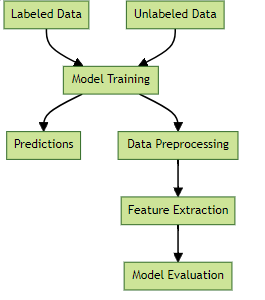

Accuracy: 0.4166666666666667


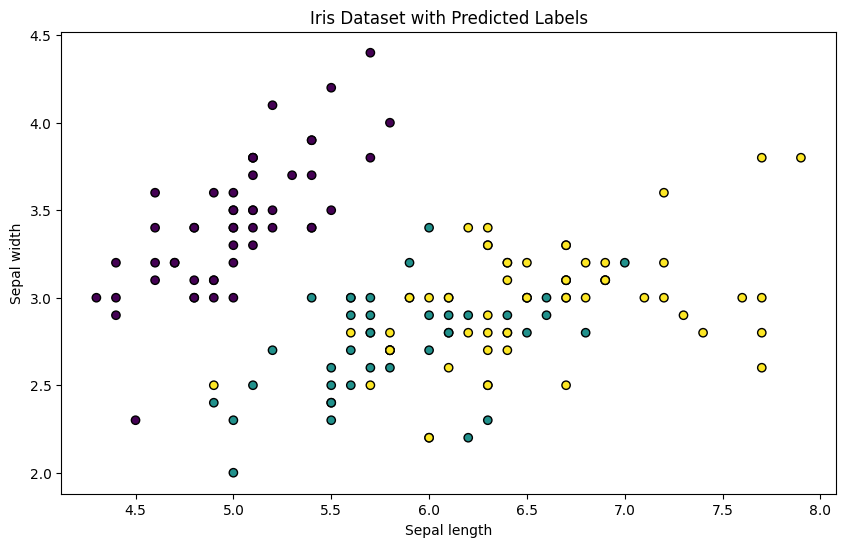

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(X, y, test_size=0.8, random_state=42)

# Define the semi-supervised learning model
model = LabelSpreading(kernel='knn', alpha=0.8)

# Fit the model with limited labeled data
model.fit(X_labeled, y_labeled)

# Predict the labels for unlabeled data
predicted_labels = model.transduction_

# Calculate accuracy
X_labeled_test, X_unlabeled_test, y_labeled_test, _ = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)
accuracy = accuracy_score(y_labeled_test, predicted_labels[:len(y_labeled_test)])
print(f"Accuracy: {accuracy}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Iris Dataset with Predicted Labels')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


# **Efficiency and Practicality:**
The integration of semi-supervised learning has significantly enhanced the efficiency of AI systems, reducing the dependency on extensive labeled datasets. This has led to a more cost-effective approach, particularly in sectors like healthcare and finance. Below is a simplified demonstration in TensorFlow:

5/5 [==============================] - 0s 3ms/step


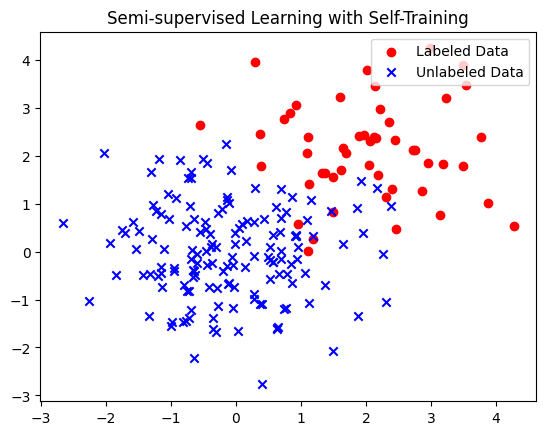

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate some synthetic data
def generate_data(n_labeled, n_unlabeled, n_features=2):
    np.random.seed(0)
    labeled_data = np.random.randn(n_labeled, n_features) + np.array([2, 2])
    unlabeled_data = np.random.randn(n_unlabeled, n_features)

    return labeled_data, unlabeled_data

# Create a simple fully connected model
def create_model(input_shape):
    model = models.Sequential([
        layers.Dense(16, activation='relu', input_shape=(input_shape,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    return model

# Semi-supervised learning with self-training
def self_training(labeled_data, unlabeled_data, model, epochs=100, threshold=0.5):
    labeled_x, labeled_y = labeled_data, np.zeros((labeled_data.shape[0], 1))
    unlabeled_x = unlabeled_data

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    for epoch in range(epochs):
        # Train the model on the labeled data
        model.fit(labeled_x, labeled_y, epochs=1, verbose=0)

        # Use the model to predict labels for the unlabeled data
        pseudo_labels = model.predict(unlabeled_x)

        # Filter pseudo-labeled data with high confidence
        high_confidence_mask = np.max(pseudo_labels, axis=1) > threshold
        pseudo_labeled_x = unlabeled_x[high_confidence_mask]
        pseudo_labeled_y = pseudo_labels[high_confidence_mask]

        # Add pseudo-labeled data to the labeled data
        labeled_x = np.concatenate([labeled_x, pseudo_labeled_x], axis=0)
        labeled_y = np.concatenate([labeled_y, pseudo_labeled_y], axis=0)

    return model

# Generate the data
labeled_data, unlabeled_data = generate_data(50, 150)

# Create the model
model = create_model(input_shape=2)

# Perform self-training
model = self_training(labeled_data, unlabeled_data, model, epochs=100, threshold=0.8)

# Plot the labeled and unlabeled data points
plt.scatter(labeled_data[:, 0], labeled_data[:, 1], c='r', marker='o', label='Labeled Data')
plt.scatter(unlabeled_data[:, 0], unlabeled_data[:, 1], c='b', marker='x', label='Unlabeled Data')
plt.title('Semi-supervised Learning with Self-Training')
plt.legend(loc='upper right')
plt.show()


# **Challenges and Growth:**
The implementation of semi-supervised learning is not without challenges. Balancing the ratio of labeled and unlabeled data and refining the learning process through continuous feedback are crucial for optimizing AI performance. Here's a simplified representation in PyTorch:

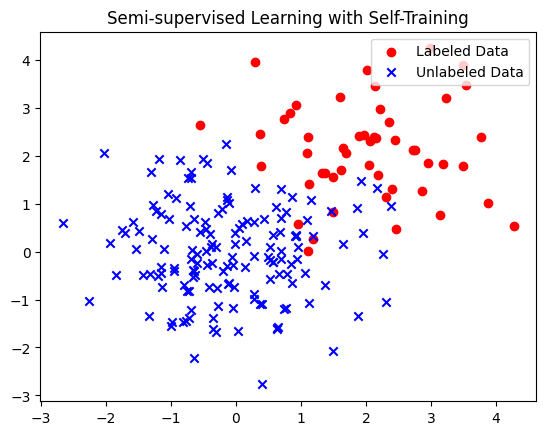

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Generate some synthetic data
def generate_data(n_labeled, n_unlabeled, n_features=2):
    np.random.seed(0)
    labeled_data = np.random.randn(n_labeled, n_features) + np.array([2, 2])
    unlabeled_data = np.random.randn(n_unlabeled, n_features)

    return labeled_data, unlabeled_data

# Create a simple fully connected model
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return out

# Semi-supervised learning with self-training
def self_training(labeled_data, unlabeled_data, model, criterion, optimizer, epochs=100, threshold=0.5):
    labeled_x, labeled_y = torch.from_numpy(labeled_data).float(), torch.zeros((labeled_data.shape[0], 1)).float()
    unlabeled_x = torch.from_numpy(unlabeled_data).float()

    for epoch in range(epochs):
        # Train the model on the labeled data
        outputs = model(labeled_x)
        loss = criterion(outputs, labeled_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Use the model to predict labels for the unlabeled data
        pseudo_labels = model(unlabeled_x).detach()

        # Filter pseudo-labeled data with high confidence
        high_confidence_mask = pseudo_labels.max(dim=1)[0] > threshold
        pseudo_labeled_x = unlabeled_x[high_confidence_mask]
        pseudo_labeled_y = pseudo_labels[high_confidence_mask]

        # Add pseudo-labeled data to the labeled data
        labeled_x = torch.cat([labeled_x, pseudo_labeled_x], dim=0)
        labeled_y = torch.cat([labeled_y, pseudo_labeled_y], dim=0)

    return model

# Generate the data
labeled_data, unlabeled_data = generate_data(50, 150)

# Create the model
model = SimpleNet(input_size=2, hidden_size=16)

# Define the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Perform self-training
model = self_training(labeled_data, unlabeled_data, model, criterion, optimizer, epochs=100, threshold=0.8)

# Plot the labeled and unlabeled data points
plt.scatter(labeled_data[:, 0], labeled_data[:, 1], c='r', marker='o', label='Labeled Data')
plt.scatter(unlabeled_data[:, 0], unlabeled_data[:, 1], c='b', marker='x', label='Unlabeled Data')
plt.title('Semi-supervised Learning with Self-Training')
plt.legend(loc='upper right')
plt.show()


# **Semi-Supervised Learning in Action:**
From healthcare diagnostics to natural language processing, and image recognition to financial analysis, the implementation of semi-supervised learning has ushered in a new era of precision and adaptability in AI-driven applications. Consider the following case study:

# **Case Study: Automated Disease Detection**
Using semi-supervised learning, a medical diagnostics company developed an AI model that could accurately detect anomalies in medical images, aiding clinicians in the early and precise identification of critical health conditions.

# **The Role of Semi-Supervised Learning in the Future:**
As the boundaries of AI continue to expand, the integration of semi-supervised learning will play a pivotal role in fostering a symbiotic relationship between humans and machines. Its adaptive nature will propel AI into uncharted territories, catalyzing transformative changes across various industries and shaping a future where intelligent machines collaborate seamlessly with human ingenuity.